O que é uma API?

É um conjunto de códigos para usar um serviço, site ou aplicativo específico, ou seja, um site, ferramenta ou plataforma disponibiliza pra gente os códigos deles para que a gente através dos nossos códigos possamos interagir com aquele site ou ferramenta. Cada site ou ferramenta tem sua própria API. É importante que você saiba ler as APIs que precisar para saber usar.
Um dos padrões mais comuns em API é pegar informações em formato json, uma espécie de dicionário que precisa ser tratada no Python para podermos analisar.
As possibilidades de API são infinitas, vamos fazer 2 exemplos aqui: Cotação de Moedas e Envio de SMS.
Sites como Google, UouTube, Facebook, Twitter, ArcGis e praticamente qualquer ferramenta ou site grande tem uma API.

O que precisamos:

Quase sempre você precisa de uma conta para consumir uma API. Algumas APIs são abertas, como a https://docs.awesomeapi.com.br/api-de-moedas, mas em muitos casos (como veremos no caso do SMS) vamos precisar ter uma conta ativa para consumir a API.
A documentação da API (ou exemplos da internet) é a chave para conseguir usar uma API

Pegar a Cotação Atual de todas as Moedas

In [23]:
import requests # Para pegar(GET) a cotação atual de todas as moedas que essa API tem disponíveis.
import json # Como as informações das APIs vem em formato json então importamos a biblioteca json para fazer tratamento.

cotacoes = requests.get('https://economia.awesomeapi.com.br/json/all')
# print(cotacoes) O resulado vem como <Response [200]> que diz que a requisição está Ok mas não mostra o resultado que queremos ver. Verificar solução abaixo.
cotacoes_dic = cotacoes.json()
print(cotacoes_dic)

{'USD': {'code': 'USD', 'codein': 'BRL', 'name': 'Dólar Americano/Real Brasileiro', 'high': '5.7246', 'low': '5.67765', 'varBid': '0.035', 'pctChange': '0.615505', 'bid': '5.7214', 'ask': '5.7244', 'timestamp': '1746538365', 'create_date': '2025-05-06 10:32:45'}, 'USDT': {'code': 'USD', 'codein': 'BRLT', 'name': 'Dólar Americano/Real Brasileiro Turismo', 'high': '5.76558', 'low': '5.71829', 'varBid': '0.03525', 'pctChange': '0.615497', 'bid': '5.76235', 'ask': '5.94037', 'timestamp': '1746538365', 'create_date': '2025-05-06 10:32:45'}, 'CAD': {'code': 'CAD', 'codein': 'BRL', 'name': 'Dólar Canadense/Real Brasileiro', 'high': '4.14647', 'low': '4.10212', 'varBid': '0.032509', 'pctChange': '0.79062', 'bid': '4.14437', 'ask': '4.15514', 'timestamp': '1746538341', 'create_date': '2025-05-06 10:32:21'}, 'GBP': {'code': 'GBP', 'codein': 'BRL', 'name': 'Libra Esterlina/Real Brasileiro', 'high': '7.66316', 'low': '7.53012', 'varBid': '0.08758', 'pctChange': '1.158819', 'bid': '7.64526', 'ask':

Qual foi a última cotação do Dólar, Euro e do BitCoin? (Sua resposta vai ser diferente do gabarito, porque estamos rodando o código em momentos diferentes, mas o seu código deve ser o mesmo/parecido)

In [25]:
print('Dólar: {}'.format(cotacoes_dic['USD']['bid']))
print('Euro: {}'.format(cotacoes_dic['EUR']['bid']))
print('Bitcoin: {}'.format(cotacoes_dic['BTC']['bid']))

Dólar: 5.7214
Euro: 6.48088
Bitcoin: 537795


Pegar a cotação dos últimos 30 dias do dólar (Sua resposta vai ser diferente do gabarito, porque estamos rodando o código em momentos diferentes, mas o seu código deve ser o mesmo/parecido)

In [27]:
cotacoes_dolar30d = requests.get('https://economia.awesomeapi.com.br/json/daily/USD-BRL/30')
cotacoes_dolar_dic = cotacoes_dolar30d.json()
#print(cotacoes_dolar_dic[2]['bid'])
lista_cotacoes_dolar = [item['bid'] for item in cotacoes_dolar_dic] # Nessa linha foi necessário criar esse list compreension para percorrer todo o dicionário, extrair uma informação para criar uma lista auxiliar. Poderia fazer isso apenas com for ao invés de usar o list compreension
print(lista_cotacoes_dolar)

['5.7233', '5.6864', '5.6516', '5.6774', '5.6725', '5.6187', '5.64763', '5.67839', '5.68393', '5.68443', '5.6788', '5.7035', '5.7198', '5.8057', '5.81464', '5.8054', '5.8067', '5.8655', '5.87641', '5.8543', '5.8642', '5.8576', '5.8838', '5.81252', '6.00467', '5.90753', '5.8356', '5.8396', '5.6307', '5.6611']


Pegar as cotações do BitCoin de Jan/20 a Out/20

In [45]:
cotacoes_bitcoin = requests.get('https://economia.awesomeapi.com.br/json/daily/BTC-BRL/200?start_date=20200101&end_date=20201031')
cotacoes_bitcoin_dicionario = cotacoes_bitcoin.json()
lista_cotacoes_bitcoin = [float(item['bid']) for item in cotacoes_bitcoin_dicionario]
lista_cotacoes_bitcoin.reverse() #Foi necessário usar o reverse para inverter a exibição dos valores dos bitcoins pois ele por padrão traz a partir o último registro de bitcoin e no caso usando o reverse a gente traz a partir do primeiro registro.
print(lista_cotacoes_bitcoin)
print(len(lista_cotacoes_bitcoin))

[35750.0, 35150.0, 37025.0, 36836.7, 37415.0, 37158.0, 36652.1, 36800.0, 38000.1, 40050.0, 41050.0, 41212.0, 41715.0, 43392.0, 43070.0, 46424.7, 46610.0, 47626.0, 47900.0, 48553.0, 48852.0, 49700.0, 52500.0, 57700.0, 52609.1, 52499.0, 49225.0, 49700.0, 51488.8, 54450.0, 56208.0, 53609.0, 54207.4, 55300.0, 55651.1, 55760.8, 54831.8, 51440.0, 51400.0, 51600.0, 49560.0, 49735.0, 47625.1, 49000.2, 51700.3, 50650.0, 51500.0, 50865.1, 53600.0, 54001.0, 49500.4, 50400.6, 48820.6, 49133.5, 48096.8, 48201.0, 49350.0, 47000.0, 48100.1, 47788.9, 47750.0, 48501.4, 49679.0, 49290.6, 50405.0, 49700.0, 49750.0, 49782.0, 50710.0, 49759.1, 49800.0, 49755.0, 49915.1, 49678.2, 49746.8, 49840.0, 49960.0, 49800.0, 49208.8, 48815.5, 48993.1, 48850.0, 49890.0, 49900.1, 50360.1, 49890.0, 49905.9, 49750.0, 49920.0, 50041.3, 50073.4, 49868.0, 49320.0, 49702.1, 49651.8, 49680.0, 49516.5, 49143.0, 49321.0, 49850.0, 49951.1, 50400.2, 50402.0, 55300.0, 56161.0, 57490.0, 57330.0, 58950.0, 61298.1, 58296.3, 59800.0, 

Gráfico com as cotações do BitCoin. Usar o matplotlib

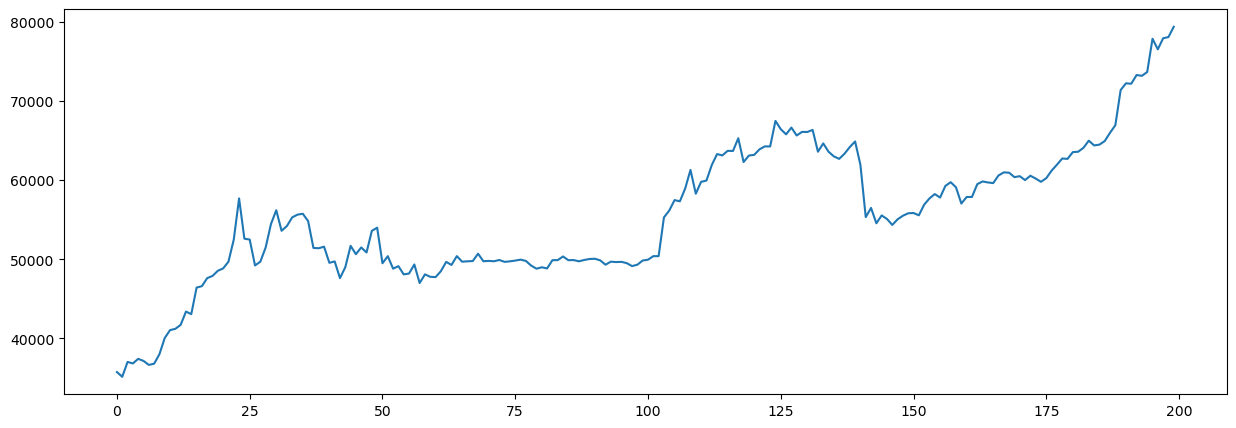

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(lista_cotacoes_bitcoin)
plt.show()